## Lab 9 : K-means Clustering

### Author   :Niyas Mon P
### Roll No. :EE20B094

In [24]:
#  Before running the code blocks, please ensure all the images are uploaded

In [25]:
# importing necessary libraries
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from scipy.io import loadmat
import numpy as np
import cv2

In [26]:
# reading the images
car = cv2.imread('car.png')
flower = cv2.imread('flower.png')

# cv2 reads image in [BGR] format, our algorithm uses [RGB] format, hence converting from BGR to RGB
car = cv2.cvtColor(car, cv2.COLOR_BGR2RGB)
flower = cv2.cvtColor(flower, cv2.COLOR_BGR2RGB)

## K- means clustering
* obtain initial cluster centroids.
* classify image pixels to clusters based on their least euclidian distance to the cluster centres.
* update cluster centre as the mean value of the pixels belonging to that cluster.
* Repeat the process until convergence or until certain number of times.
*`K_means` function takes image, initial centroids and maximum number of iterations as inputs and perfroms K-means clustering. It outputs final cluster centres, classes to which each pixels belongs to and the cost of the clustering.
* Cost of the clustering is calculated as follows
$$
          C = \Sigma_{i=1}^{i=P}dist(p_i,c_k)
$$
where dist measures the Euclidean distance between a pixel color value p_i and its cluster center
c_k , and P refers to the total number of pixels in the image. This cost measure will be helpful when we perform using random initial centroids.

In [27]:
def K_means(img,k_means,centroids_init,max_iter):
  # k_means          : number of clusters
  # centroids_init   : inital centroids
  # max_iter         : number of maximum iterations of the algorithm

  centroids          = centroids_init
  m,n,_              = img.shape # shape of the image
  labels             = np.zeros((m,n)) # labels: cluster to which each pixel belongs to
  cost               = 0 # cost of the final clustering

  for i in range(max_iter):

    # array to store euclidian distance of each pixel with each centroids
    norms            = np.zeros((m,n,k_means))

    # finding the euclidian distance to each centroid
    for k in range(k_means):
      centroid       = centroids[k]
      norms[:,:,k]   = np.linalg.norm(img - centroid, axis=2)

    # label update: cluster to which each pixel belongs to (min disntace with centroid)
    labels           = np.argmin(norms,axis=2)

    # finding the new centroids
    for k in range(k_means):
      cluster_pixels = img[labels == k]
      # update only if the cluster is non-empty
      if len(cluster_pixels) > 0:
        centroids[k] = np.mean(cluster_pixels,axis=0)

  # cost update
  cost = np.sum(np.min(norms,axis=2))


  return centroids, labels, cost


## Image segmentation
* A segmented image is produced to visualize the output of k-mean clustering
* It's done by replacing each pixels in the input image with the cluster center it belongs to.
* `segment` takes labels of pixels and centroids and outputs the segmented image

In [28]:
def segment(labels,centroids):

  k_means = centroids.shape[0] # number of clusters
  m,n = labels.shape # shape of the image

  # array to store the segmented image
  segmented_image = np.zeros((m,n,3),dtype=np.uint8)

  # producing the segmetned image
  for k in range(k_means):
    if len(segmented_image[labels == k])>0:
      # assigning each pixels values with the cluster center it belongs to
      segmented_image[labels == k] = centroids[k]

  return segmented_image

## K-means clustering using random intial centroids
* Intial centroids are randomly sampled from uniform distribution in [0,255]
* K-means clustering is performed using N(=30) such random initialization.
* In each run we store the cost of each clustering.
* We display the segmented images corresponding to low clustering cost and high clustering cost.
* `K_means_random_init` perform the K-means clustering using random initialization given the N and outputs costs and segmented images associated with each clustering out of N

In [29]:
def K_means_random_init(img, N, k_means, max_iter):
  # N                : number of random initializations
  # k_means          : number of clusters
  # max_iter         : number of maximum iterations of the algorithm

  # array to store costs for each clustering
  costs = np.zeros((N,1))

  m,n,_ = img.shape # shape of the image

  # array to store output images
  output_images = np.zeros((N,m,n,3),dtype=np.uint8)

  for i in range(N):
    # random initialization of cluster centroids sampled from uniform distribution in [0 255]
    c_init = np.random.uniform(0, 256, (k_means, 3))

    # performing K-means clustering
    centroids, labels, cost = K_means(img,k_means,c_init,max_iter)
    segmented_image   = segment(labels,centroids)

    # updating the cost array and output image array
    costs[i] = cost
    output_images[i]  = segmented_image

  return output_images, costs

# Plots

a) With the given initial cluster means
$$
c_1^{init} = [255, 0, 0] \\
c_2^{init} = [0, 0, 0] \\
c_3^{init} = [255, 255, 255]
$$


In [30]:
c_init   = np.array([[255,0,0],[0,0,0],[255,255,255]])
k_means  = 3
max_iter = 5

(-0.5, 258.5, 193.5, -0.5)

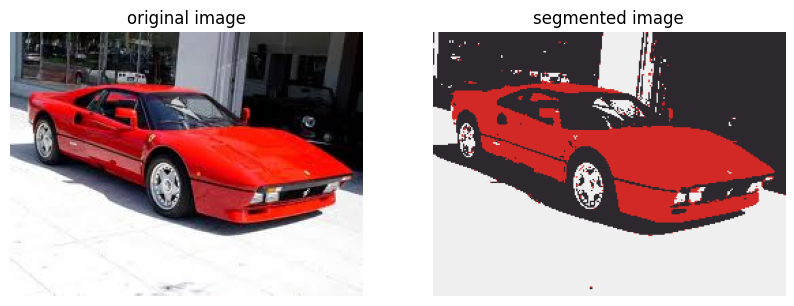

In [31]:
# K-means clustering for 'car.png'
centroids, labels,_ = K_means(car,k_means,c_init,max_iter)
segmented_image     = segment(labels,centroids)

plt.figure(figsize=(10,8))

# original image
plt.subplot(1,2,1)
plt.imshow(car)
plt.title('original image')
plt.axis('off')

# segmented image
plt.subplot(1,2,2)
plt.imshow(segmented_image)
plt.title('segmented image')
plt.axis('off')

(-0.5, 174.5, 199.5, -0.5)

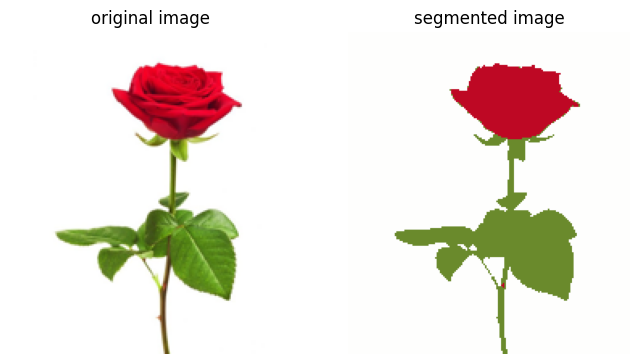

In [32]:
# K-means clustering for 'flower.png'
centroids, labels,_ = K_means(flower,k_means,c_init,max_iter)
segmented_image     = segment(labels,centroids)

plt.figure(figsize=(8,10))

# original image
plt.subplot(1,2,1)
plt.imshow(flower)
plt.title('original image')
plt.axis('off')

# segmented image
plt.subplot(1,2,2)
plt.imshow(segmented_image)
plt.title('segmented image')
plt.axis('off')

b) With random initialization of cluster means and $N = 30$

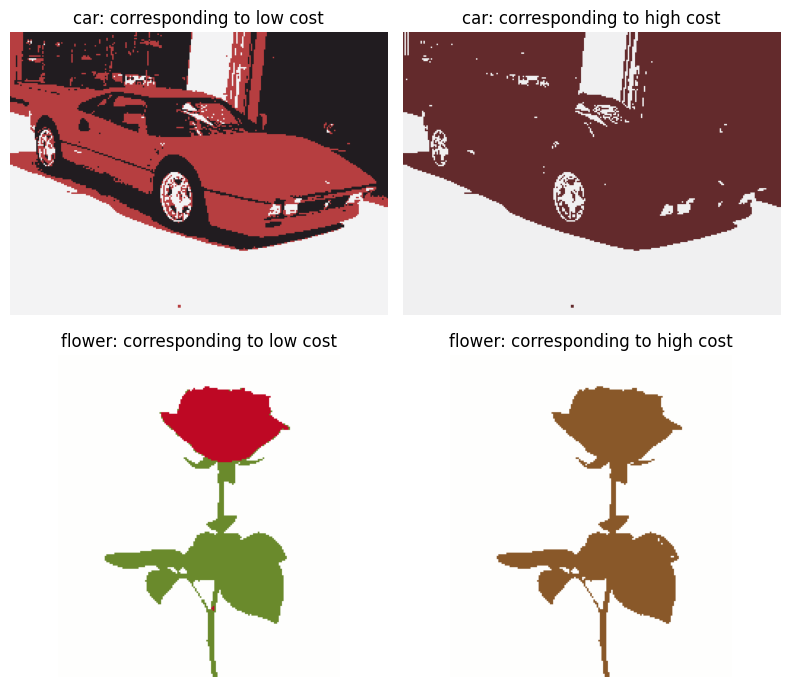

In [33]:
images   = [car,flower]
titles   = ['car', 'flower']
N        = 30
k_means  = 3
max_iter = 5

plt.figure(figsize=(8,7))

for i,image in enumerate(images):
  # performing k-means clustering with random initialization of centroids, repeated N(=30) times
  segmented_images, costs = K_means_random_init(image,N,k_means,max_iter)

  # indices of image corresponding to low and high clustering cost among 30 segmented images
  low_cost_id             = np.argmin(costs)
  high_cost_id            = np.argmax(costs)

  # segmented images corresponding to low & high clustering cost
  low_cost_image          =  segmented_images[low_cost_id]
  high_cost_image         = segmented_images[high_cost_id]

  # low cost image
  plt.subplot(2,2,2*i+1)
  plt.imshow(low_cost_image)
  plt.title(f'{titles[i]}: corresponding to low cost')
  plt.axis('off')

  # high cost image
  plt.subplot(2,2,2*i+2)
  plt.imshow(high_cost_image)
  plt.title(f'{titles[i]}: corresponding to high cost')
  plt.axis('off')

plt.tight_layout()
plt.show()

## Observations

* With the given initial centroids, the k-means clustering gives a good result.
* k-means clustring is very sensitive to initial centroids. It can stuck at local minima which may not be optimal.
* While doing with random initialization of centroids, the output can vary significantly with each run.
* While doing with random initialization, we need to run the clustering multiple times and choose the one with lower cost of clustering.
* If the image has more color variations, we need to increase the number of clusters for better segmentation.